In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.metrics import silhouette_samples, silhouette_score

from IPython.display import display, HTML

In [19]:
CLUSTER_DICT = {
    'uraian_jenis_perusahaan': 'Uraian Jenis Perusahaan',
    'uraian_risiko_proyek' : 'Uraian Risiko Proyek',
    'skala_usaha': 'Skala Usaha',
    'golongan_kbli': 'Golongan KBLI',
}

In [20]:
TARGET_COLUMN = 'skala_usaha'

In [21]:
df = pd.read_csv('transform_datasets/transform_df_'+ TARGET_COLUMN +'.csv')
df.set_index('kecamatan', inplace=True)

In [22]:
df

,Usaha Mikro,Usaha Besar,Usaha Kecil,Usaha Menengah
kecamatan,,,,
Amurang,179,188,62,13
Amurang Barat,125,44,32,28
Suluun Tareran,53,1,1,0
Tumpaan,104,48,46,24
Amurang Timur,62,139,38,23
Tenga,64,5,6,0
Maesaan,20,26,13,0
Motoling,73,2,2,0
Motoling Timur,22,38,33,0


## Menentukan Jumlah Cluster

### Elbow Method

In [23]:
def visualizeElbow(df, KmeansModel):
    visualizer = KElbowVisualizer(KmeansModel, k=(2,10))
    visualizer.fit(df)
    visualizer.show()

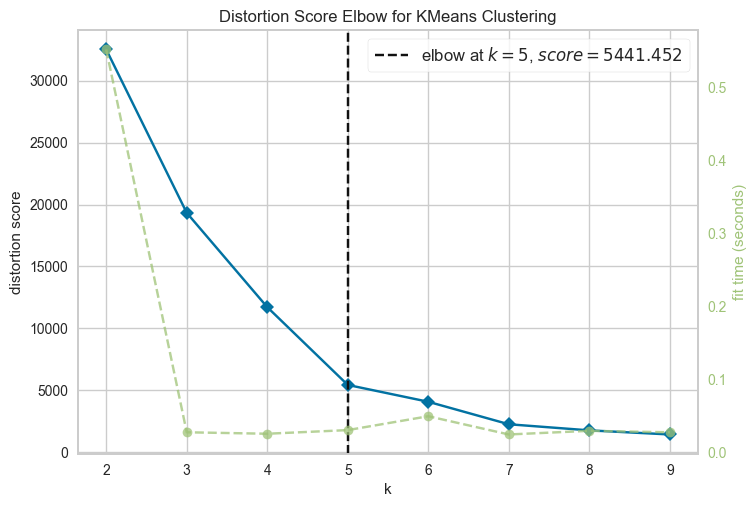

In [24]:
model = KMeans(
    init="random",
    n_init=10,
    max_iter=300,
    random_state=42
)

visualizeElbow(df, model)

### Silhouette Method

In [25]:
def visualizeSilhouette(df, KmeansModel):
    visualizer = SilhouetteVisualizer(KmeansModel, colors='yellowbrick')
    visualizer.fit(df)
    visualizer.show()

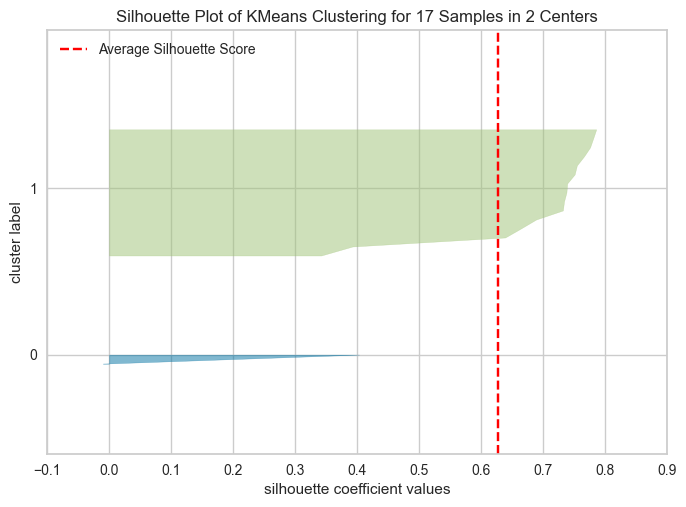

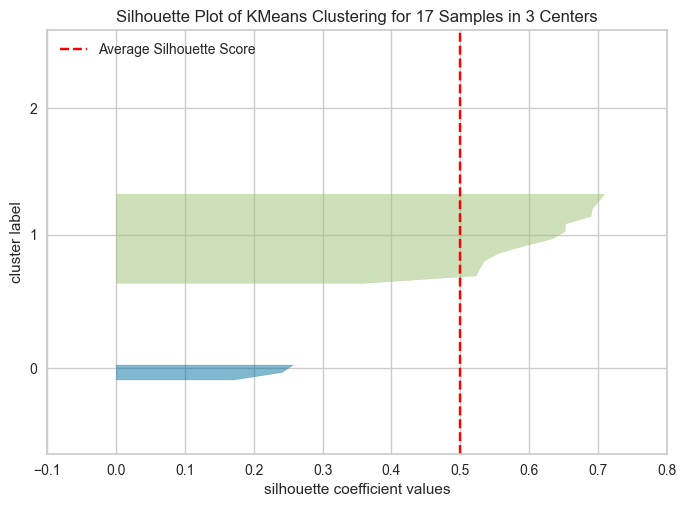

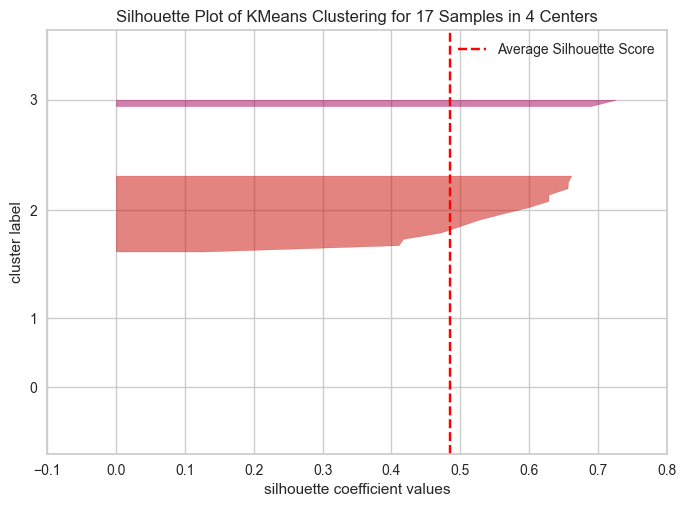

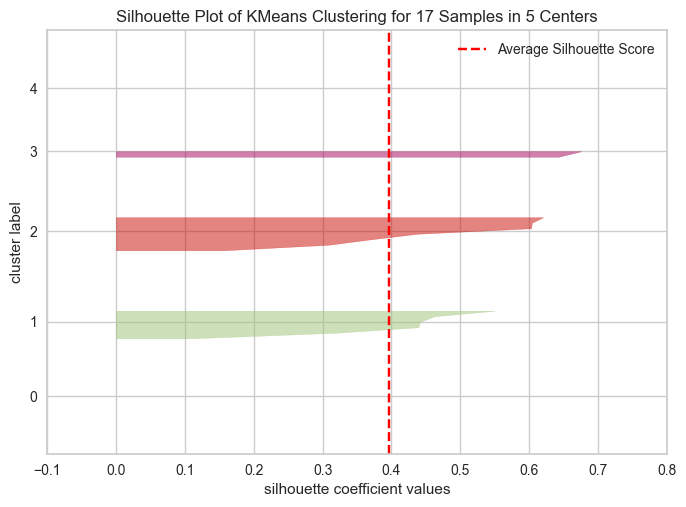

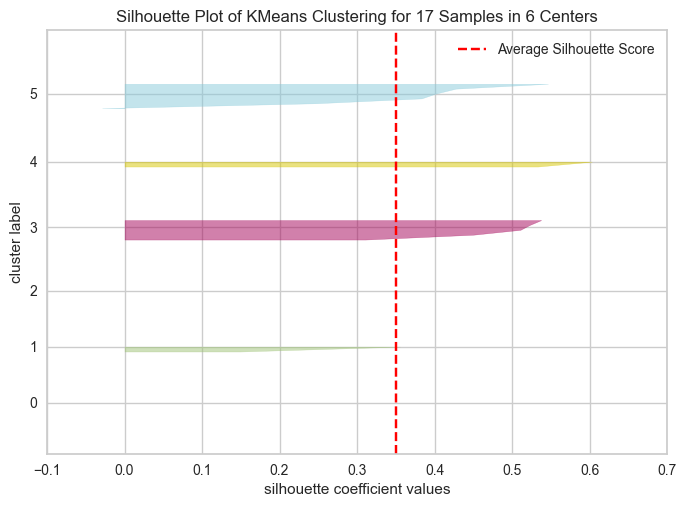

In [26]:
for n_cluster in range(2,7):
    model = KMeans(
        init="random",
        n_clusters=n_cluster,
        n_init=10,
        max_iter=300,
        random_state=42
    )
    visualizeSilhouette(df, model)

# Kmeans Clustering

In [27]:
NUMBER_OF_CLUSTER = 5

In [28]:
kmeans = KMeans(
    init="random",
    n_clusters=NUMBER_OF_CLUSTER,
    n_init=10,
    max_iter=300,
    random_state=42
)
clusters_label = kmeans.fit_predict(df)

In [29]:
clusters_label

array([0, 3, 2, 3, 4, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [30]:
clusters_label_mapped = list(map(lambda x: 'C' + str(x), clusters_label))

In [31]:
df['cluster'] = clusters_label_mapped

In [32]:
df

,Usaha Mikro,Usaha Besar,Usaha Kecil,Usaha Menengah,cluster
kecamatan,,,,,
Amurang,179,188,62,13,C0
Amurang Barat,125,44,32,28,C3
Suluun Tareran,53,1,1,0,C2
Tumpaan,104,48,46,24,C3
Amurang Timur,62,139,38,23,C4
Tenga,64,5,6,0,C2
Maesaan,20,26,13,0,C1
Motoling,73,2,2,0,C2
Motoling Timur,22,38,33,0,C1


# Deskripsi Cluster

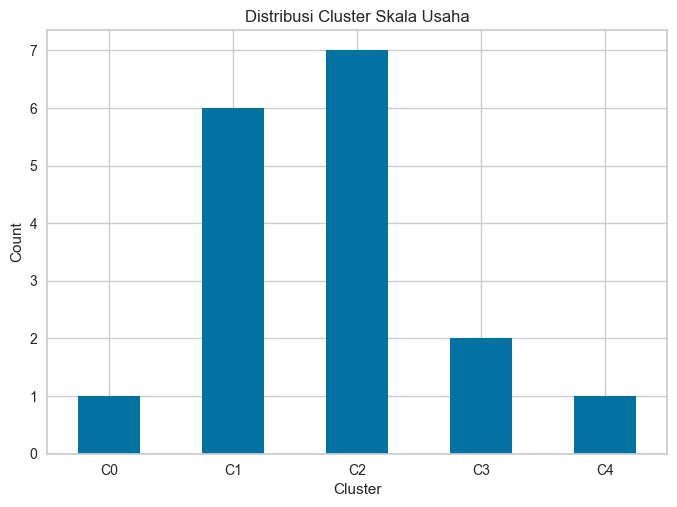

In [45]:
df['cluster'].value_counts().sort_index().plot(kind='bar', rot=0)
plt.xlabel('Cluster', rotation=0)
plt.ylabel('Count')
plt.title('Distribusi Cluster ' + CLUSTER_DICT[TARGET_COLUMN])
plt.show()

In [54]:
for cluster in df.cluster.unique():
    print("\nData ", CLUSTER_DICT[TARGET_COLUMN], "cluster: ", cluster)
    display_df = df.loc[df.cluster == cluster]
    display(HTML(display_df.to_html()))
    print('Deskripsi cluster')
    display(HTML(display_df.describe().to_html()))
    
    
    
    
    print('\n\n\n\n----------------------------------------------------------------------')


Data  Skala Usaha cluster:  C0


,Usaha Mikro,Usaha Besar,Usaha Kecil,Usaha Menengah,cluster
kecamatan,,,,,
Amurang,179,188,62,13,C0


Deskripsi cluster


,Usaha Mikro,Usaha Besar,Usaha Kecil,Usaha Menengah
count,1.0,1.0,1.0,1.0
mean,179.0,188.0,62.0,13.0
std,NaN,NaN,NaN,NaN
min,179.0,188.0,62.0,13.0
25%,179.0,188.0,62.0,13.0
50%,179.0,188.0,62.0,13.0
75%,179.0,188.0,62.0,13.0
max,179.0,188.0,62.0,13.0






----------------------------------------------------------------------

Data  Skala Usaha cluster:  C3


,Usaha Mikro,Usaha Besar,Usaha Kecil,Usaha Menengah,cluster
kecamatan,,,,,
Amurang Barat,125,44,32,28,C3
Tumpaan,104,48,46,24,C3


Deskripsi cluster


,Usaha Mikro,Usaha Besar,Usaha Kecil,Usaha Menengah
count,2.000000,2.000000,2.000000,2.000000
mean,114.500000,46.000000,39.000000,26.000000
std,14.849242,2.828427,9.899495,2.828427
min,104.000000,44.000000,32.000000,24.000000
25%,109.250000,45.000000,35.500000,25.000000
50%,114.500000,46.000000,39.000000,26.000000
75%,119.750000,47.000000,42.500000,27.000000
max,125.000000,48.000000,46.000000,28.000000






----------------------------------------------------------------------

Data  Skala Usaha cluster:  C2


,Usaha Mikro,Usaha Besar,Usaha Kecil,Usaha Menengah,cluster
kecamatan,,,,,
Suluun Tareran,53,1,1,0,C2
Tenga,64,5,6,0,C2
Motoling,73,2,2,0,C2
Modoinding,71,28,14,25,C2
Tareran,65,29,11,0,C2
Sinonsayang,77,0,6,0,C2
Tatapaan,44,2,9,0,C2


Deskripsi cluster


,Usaha Mikro,Usaha Besar,Usaha Kecil,Usaha Menengah
count,7.000000,7.000000,7.000000,7.000000
mean,63.857143,9.571429,7.000000,3.571429
std,11.696560,13.023788,4.690416,9.449112
min,44.000000,0.000000,1.000000,0.000000
25%,58.500000,1.500000,4.000000,0.000000
50%,65.000000,2.000000,6.000000,0.000000
75%,72.000000,16.500000,10.000000,0.000000
max,77.000000,29.000000,14.000000,25.000000






----------------------------------------------------------------------

Data  Skala Usaha cluster:  C4


,Usaha Mikro,Usaha Besar,Usaha Kecil,Usaha Menengah,cluster
kecamatan,,,,,
Amurang Timur,62,139,38,23,C4


Deskripsi cluster


,Usaha Mikro,Usaha Besar,Usaha Kecil,Usaha Menengah
count,1.0,1.0,1.0,1.0
mean,62.0,139.0,38.0,23.0
std,NaN,NaN,NaN,NaN
min,62.0,139.0,38.0,23.0
25%,62.0,139.0,38.0,23.0
50%,62.0,139.0,38.0,23.0
75%,62.0,139.0,38.0,23.0
max,62.0,139.0,38.0,23.0






----------------------------------------------------------------------

Data  Skala Usaha cluster:  C1


,Usaha Mikro,Usaha Besar,Usaha Kecil,Usaha Menengah,cluster
kecamatan,,,,,
Maesaan,20,26,13,0,C1
Motoling Timur,22,38,33,0,C1
Tompaso Baru,29,28,21,6,C1
Ranoyapo,23,5,3,0,C1
Motoling Barat,30,1,2,0,C1
Kumelembuai,12,46,4,0,C1


Deskripsi cluster


,Usaha Mikro,Usaha Besar,Usaha Kecil,Usaha Menengah
count,6.000000,6.000000,6.000000,6.00000
mean,22.666667,24.000000,12.666667,1.00000
std,6.562520,17.832555,12.372011,2.44949
min,12.000000,1.000000,2.000000,0.00000
25%,20.500000,10.250000,3.250000,0.00000
50%,22.500000,27.000000,8.500000,0.00000
75%,27.500000,35.500000,19.000000,0.00000
max,30.000000,46.000000,33.000000,6.00000






----------------------------------------------------------------------


### Simpan Hasil Cluster